## PRACTICE 5 

### EXERCISE 1 

In [1]:
from sympy import dsolve, Eq, symbols, Function, nonlinsolve, solve, diff, lambdify, log, sqrt, hessian, Matrix
from sympy.plotting import plot
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

{(0, 0), (0, 2), (1, 1), (3/2, 0)}

fixed point (0, 0)
TYPE:
Node unstable
det6.0, trace5.0, k1.0
eigenvalues [3. 2.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]

fixed point (0, 2)
TYPE:
 Unstable Saddle Point
det-2.0, trace-1.0, k9.0
eigenvalues [-2.  1.]
hyperbolic node
eigenvectors [[ 0.          0.83205029]
 [ 1.         -0.5547002 ]]

fixed point (1, 1)
TYPE:
Node stable
det1.0, trace-3.0, k5.0
eigenvalues [-2.61803399 -0.38196601]
hyperbolic node
eigenvectors [[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]

fixed point (3/2, 0)
TYPE:
 Unstable Saddle Point
det-1.5, trace-2.5, k12.25
eigenvalues [-3.   0.5]
hyperbolic node
eigenvectors [[ 1.         -0.3939193 ]
 [ 0.          0.91914503]]


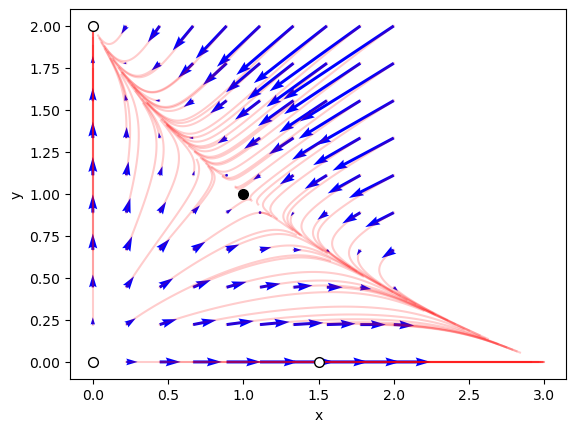

In [2]:
#fps
x = symbols('x')
y = symbols('y')
difx = x*(3 - 2*x - y)
dify = y*(2 - x - y)
fxp = nonlinsolve([difx, dify], [x, y])
print(fxp)

#jacobian
difx1 = diff(difx, x, 1)
difx2 = diff(difx, y, 1)
dify1 = diff(dify, x, 1)
dify2 = diff(dify, y, 1)
a = Matrix([[difx1, difx2], [dify1, dify2]])
types=[]

for e in fxp:
    va = []
    print("\n\033[1;32m" + f"fixed point {e}" + "\033[0m")
    a_new = a.subs({x: e[0], y: e[1]})

    for i in a_new:
        va.append(i)
    e, b, c, d = va
    J = np.matrix([[e,b],[c,d]]).astype('float64')
    dJ = np.linalg.det(J)
    tJ = np.trace(J)
    k = tJ**2 - 4*dJ
    epsFIX = 1e-6
    print('TYPE:')
    if dJ < -epsFIX:
        print(' Unstable Saddle Point')
        types.append('white')
    elif np.abs(dJ) < epsFIX:
        print('Multiple fixed points')
        if tJ > epsFIX:
            stb = 'unstable'
            types.append('white')
        elif tJ < -epsFIX:
            stb = 'stable'
            types.append('black')
        else:
            print('The whole plane is a fixed point')
    else:
        if np.abs(tJ) < epsFIX:
            print('Center')

        else:
            if tJ > epsFIX:
                stb = 'unstable'
                types.append('white')
            else:
                stb = 'stable'
                types.append('black')
            if k < -epsFIX:
                print('spiral ' + stb)
            elif np.abs(k) < epsFIX:
                print('star, degenerate node ' + stb)
            else:
                print('Node ' + stb)
    print(f'det{round(dJ,2)}, trace{tJ}, k{k}')
    w, v =  np.linalg.eig(J)
    print('eigenvalues', w)
    if (w[0].real and w[1].real) != 0:
        print('hyperbolic node')
    else:
        print('non-hyperbolic node')
    print('eigenvectors', v)
    
def model(x, t):
    return [x[0]*(3 - x[0] - 2*x[1]), x[1]*(2 - x[0] - x[1])]


ts = np.linspace(0, 2, 100)
ic = np.linspace(0, 2, 10)
for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-', alpha=0.2)
        
c=0
for p in fxp:
    plt.plot(p[0], p[1], marker="o", markersize=7, markeredgecolor="black", markerfacecolor=types[c])
    c+=1
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params()

X, Y = np.mgrid[0:2:10j, 0:2:10j]
u = X*(3 - X - 2*Y)
v = Y*(2 - X - Y)
plt.quiver(X, Y, u, v, color='b')
plt.show()

### EXERCISE 2 

{(0, 0), (0, 2), (3, 0)}

fixed point (0, 0)
TYPE:
Node unstable
det6.0, trace5.0, k1.0
eigenvalues [3. 2.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]

fixed point (0, 2)
TYPE:
 Unstable Saddle Point
det-2.0, trace-1.0, k9.0
eigenvalues [-2.  1.]
hyperbolic node
eigenvectors [[ 0.          0.83205029]
 [ 1.         -0.5547002 ]]

fixed point (3, 0)
TYPE:
Node stable
det3.0, trace-4.0, k3.9999999999999982
eigenvalues [-3. -1.]
hyperbolic node
eigenvectors [[ 1.         -0.83205029]
 [ 0.          0.5547002 ]]


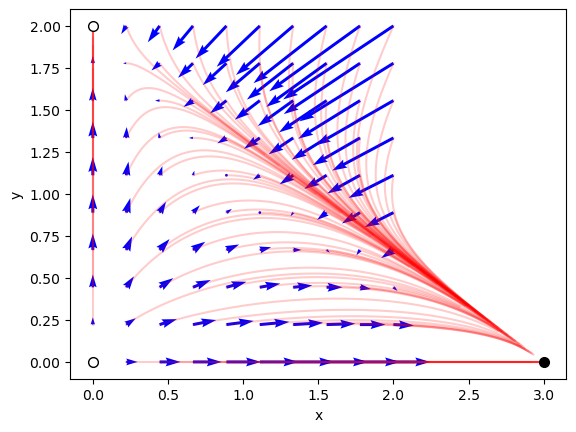

In [3]:
difx = x*(3 - x - y)
dify = y*(2 - x - y)
fxp = nonlinsolve([difx, dify], [x, y])
print(fxp)

#jacobian
difx1 = diff(difx, x, 1)
difx2 = diff(difx, y, 1)
dify1 = diff(dify, x, 1)
dify2 = diff(dify, y, 1)
a = Matrix([[difx1, difx2], [dify1, dify2]])

types=[]

for e in fxp:
    va = []
    print("\n\033[1;32m" + f"fixed point {e}" + "\033[0m")
    a_new = a.subs({x: e[0], y: e[1]})

    for i in a_new:
        va.append(i)
    e, b, c, d = va
    J = np.matrix([[e,b],[c,d]]).astype('float64')
    dJ = np.linalg.det(J)
    tJ = np.trace(J)
    k = tJ**2 - 4*dJ
    epsFIX = 1e-6
    print('TYPE:')
    if dJ < -epsFIX:
        print(' Unstable Saddle Point')
        types.append('white')
    elif np.abs(dJ) < epsFIX:
        print('Multiple fixed points')
        if tJ > epsFIX:
            stb = 'unstable'
            types.append('white')
        elif tJ < -epsFIX:
            stb = 'stable'
            types.append('black')
        else:
            print('The whole plane is a fixed point')
    else:
        if np.abs(tJ) < epsFIX:
            print('Center')

        else:
            if tJ > epsFIX:
                stb = 'unstable'
                types.append('white')
            else:
                stb = 'stable'
                types.append('black')
            if k < -epsFIX:
                print('spiral ' + stb)
            elif np.abs(k) < epsFIX:
                print('star, degenerate node ' + stb)
            else:
                print('Node ' + stb)
    print(f'det{round(dJ,2)}, trace{tJ}, k{k}')
    w, v =  np.linalg.eig(J)
    print('eigenvalues', w)
    if (w[0].real and w[1].real) != 0:
        print('hyperbolic node')
    else:
        print('non-hyperbolic node')
    print('eigenvectors', v)
    
def model(x, t):
    return [x[0]*(3 - x[0] - x[1]), x[1]*(2 - x[0] - x[1])]

#
ts = np.linspace(0, 2, 100)
ic = np.linspace(0, 2, 10)
for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-', alpha=0.2)
        
c=0
for p in fxp:
    plt.plot(p[0], p[1], marker="o", markersize=7, markeredgecolor="black", markerfacecolor=types[c])
    c+=1
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params()

X, Y = np.mgrid[0:2:10j, 0:2:10j]
u = X*(3 - X - 2*Y)
v = Y*(2 - X - Y)
plt.quiver(X, Y, u, v, color='b')
plt.show()

{(0, 0), (0, 2), (1, 1), (3/2, 0)}

fixed point (0, 0)
TYPE:
Node unstable
det6.0, trace5.0, k1.0
eigenvalues [3. 2.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]

fixed point (0, 2)
TYPE:
 Unstable Saddle Point
det-2.0, trace-1.0, k9.0
eigenvalues [-2.  1.]
hyperbolic node
eigenvectors [[ 0.          0.83205029]
 [ 1.         -0.5547002 ]]

fixed point (1, 1)
TYPE:
Node stable
det1.0, trace-3.0, k5.0
eigenvalues [-2.61803399 -0.38196601]
hyperbolic node
eigenvectors [[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]

fixed point (3/2, 0)
TYPE:
 Unstable Saddle Point
det-1.5, trace-2.5, k12.25
eigenvalues [-3.   0.5]
hyperbolic node
eigenvectors [[ 1.         -0.3939193 ]
 [ 0.          0.91914503]]


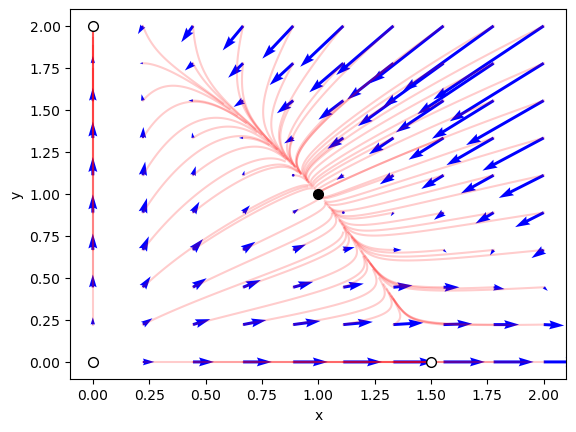

In [4]:
difx = x*(3 - 2*x - y)
dify = y*(2 - x - y)
fxp = nonlinsolve([difx, dify], [x, y])
print(fxp)

#jacobian
difx1 = diff(difx, x, 1)
difx2 = diff(difx, y, 1)
dify1 = diff(dify, x, 1)
dify2 = diff(dify, y, 1)
a = Matrix([[difx1, difx2], [dify1, dify2]])

types=[]

for e in fxp:
    va = []
    print("\n\033[1;32m" + f"fixed point {e}" + "\033[0m")
    a_new = a.subs({x: e[0], y: e[1]})

    for i in a_new:
        va.append(i)
    e, b, c, d = va
    J = np.matrix([[e,b],[c,d]]).astype('float64')
    dJ = np.linalg.det(J)
    tJ = np.trace(J)
    k = tJ**2 - 4*dJ
    epsFIX = 1e-6
    print('TYPE:')
    if dJ < -epsFIX:
        print(' Unstable Saddle Point')
        types.append('white')
    elif np.abs(dJ) < epsFIX:
        print('Multiple fixed points')
        if tJ > epsFIX:
            stb = 'unstable'
            types.append('white')
        elif tJ < -epsFIX:
            stb = 'stable'
            types.append('black')
        else:
            print('The whole plane is a fixed point')
    else:
        if np.abs(tJ) < epsFIX:
            print('Center')

        else:
            if tJ > epsFIX:
                stb = 'unstable'
                types.append('white')
            else:
                stb = 'stable'
                types.append('black')
            if k < -epsFIX:
                print('spiral ' + stb)
            elif np.abs(k) < epsFIX:
                print('star, degenerate node ' + stb)
            else:
                print('Node ' + stb)
    print(f'det{round(dJ,2)}, trace{tJ}, k{k}')
    w, v =  np.linalg.eig(J)
    print('eigenvalues', w)
    if (w[0].real and w[1].real) != 0:
        print('hyperbolic node')
    else:
        print('non-hyperbolic node')
    print('eigenvectors', v)
    
def model(x, t):
    return [x[0]*(3 - 2*x[0] - x[1]), x[1]*(2 - x[0] - x[1])]

#
ts = np.linspace(0, 2, 100)
ic = np.linspace(0, 2, 10)
for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-', alpha=0.2)
        
c=0
for p in fxp:
    plt.plot(p[0], p[1], marker="o", markersize=7, markeredgecolor="black", markerfacecolor=types[c])
    c+=1
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params()

X, Y = np.mgrid[0:2:10j, 0:2:10j]
u = X*(3 - X - 2*Y)
v = Y*(2 - X - Y)
plt.quiver(X, Y, u, v, color='b')
plt.show()

{(0, 0), (0, 2), (3/2, 0)}

fixed point (0, 0)
TYPE:
Node unstable
det6.0, trace5.0, k1.0
eigenvalues [3. 2.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]

fixed point (0, 2)
TYPE:
Node stable
det2.0, trace-3.0, k1.0
eigenvalues [-2. -1.]
hyperbolic node
eigenvectors [[ 0.          0.4472136 ]
 [ 1.         -0.89442719]]

fixed point (3/2, 0)
TYPE:
 Unstable Saddle Point
det-1.5, trace-2.5, k12.25
eigenvalues [-3.   0.5]
hyperbolic node
eigenvectors [[ 1.         -0.65079137]
 [ 0.          0.7592566 ]]


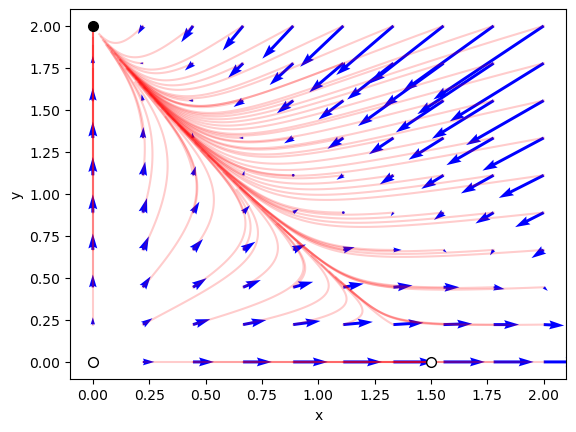

In [6]:
difx = x*(3 - 2*x - 2*y)
dify = y*(2 - x - y)
fxp = nonlinsolve([difx, dify], [x, y])
print(fxp)

#jacobian
difx1 = diff(difx, x, 1)
difx2 = diff(difx, y, 1)
dify1 = diff(dify, x, 1)
dify2 = diff(dify, y, 1)
a = Matrix([[difx1, difx2], [dify1, dify2]])

types=[]

for e in fxp:
    va = []
    print("\n\033[1;32m" + f"fixed point {e}" + "\033[0m")
    a_new = a.subs({x: e[0], y: e[1]})

    for i in a_new:
        va.append(i)
    e, b, c, d = va
    J = np.matrix([[e,b],[c,d]]).astype('float64')
    dJ = np.linalg.det(J)
    tJ = np.trace(J)
    k = tJ**2 - 4*dJ
    epsFIX = 1e-6
    print('TYPE:')
    if dJ < -epsFIX:
        print(' Unstable Saddle Point')
        types.append('white')
    elif np.abs(dJ) < epsFIX:
        print('Multiple fixed points')
        if tJ > epsFIX:
            stb = 'unstable'
            types.append('white')
        elif tJ < -epsFIX:
            stb = 'stable'
            types.append('black')
        else:
            print('The whole plane is a fixed point')
    else:
        if np.abs(tJ) < epsFIX:
            print('Center')

        else:
            if tJ > epsFIX:
                stb = 'unstable'
                types.append('white')
            else:
                stb = 'stable'
                types.append('black')
            if k < -epsFIX:
                print('spiral ' + stb)
            elif np.abs(k) < epsFIX:
                print('star, degenerate node ' + stb)
            else:
                print('Node ' + stb)
    print(f'det{round(dJ,2)}, trace{tJ}, k{k}')
    w, v =  np.linalg.eig(J)
    print('eigenvalues', w)
    if (w[0].real and w[1].real) != 0:
        print('hyperbolic node')
    else:
        print('non-hyperbolic node')
    print('eigenvectors', v)
    
def model(x, t):
    return [x[0]*(3 - 2*x[0] - 2*x[1]), x[1]*(2 - x[0] - x[1])]

#
ts = np.linspace(0, 2, 100)
ic = np.linspace(0, 2, 10)
for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-', alpha=0.2)
        
c=0
for p in fxp:
    plt.plot(p[0], p[1], marker="o", markersize=7, markeredgecolor="black", markerfacecolor=types[c])
    c+=1
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params()

X, Y = np.mgrid[0:2:10j, 0:2:10j]
u = X*(3 - X - 2*Y)
v = Y*(2 - X - Y)
plt.quiver(X, Y, u, v, color='b')
plt.show()

### HOLLING-TANNER MODEL

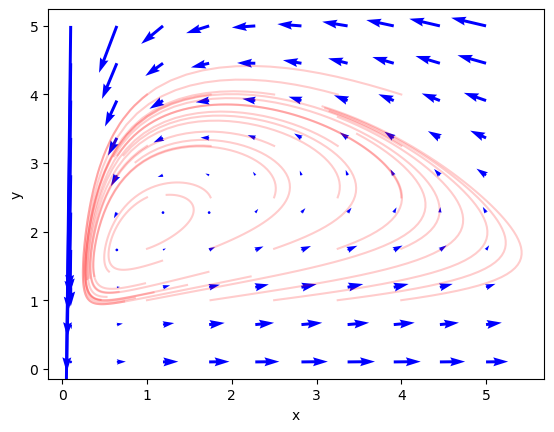

In [8]:
def model(X, t):
    return np.array([X[0] * (1 - X[0]/7) - 6 * X[0] * X[1] / (7 + 7*X[0]),
                    0.2 * X[1] * (1 - 0.5 * X[1] / X[0])])

ts = np.linspace(1, 10, 50)
ic = np.linspace(1, 4, 5)
for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-',alpha=0.2)


plt.xlabel('x')
plt.ylabel('y')
plt.tick_params()

X, Y = np.mgrid[0.1:5:10j, 0.1:5:10j]
u = X * (1 - X/7) - 6 * X * Y/ (7 + 7*X)
v = 0.2*Y*(1 - 0.5 *Y / X)
plt.quiver(X, Y, u, v, color='b')

plt.show()
